#Importing DataSet

#Import Libraries

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

#Data Preprocessing

##Tranning Image Preprocesing

In [9]:
traning_set = keras.utils.image_dataset_from_directory(
    'D:\Project_7th_Sem\Fruits_Data_Set\Images\Train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


##Validation Image Preprocessing

In [10]:
validation_set = keras.utils.image_dataset_from_directory(
    'D:\Project_7th_Sem\Fruits_Data_Set\Images\Test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 359 files belonging to 36 classes.


#Bulding Model

In [11]:
cnn = tf.keras.models.Sequential()

##Bulding convolution Layer

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides= 2))

C:\Users\prith\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# to minimize the size and get only important feature
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides= 2))

In [14]:
# # Dropout helps to prevent overfitting
# cnn.add(tf.keras.layers.Dropout(0.5))

In [15]:
cnn.add(tf.keras.layers.Flatten())

In [16]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu')) # To Build Neurons (Hidden Layer)

In [17]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [18]:
cnn.add(tf.keras.layers.Dropout(0.5))  #Dropping some neuron to avoid overfitting

In [19]:
cnn.add(tf.keras.layers.Dense(units=36, activation='softmax')) # Output Layer

#Compiling and Traning Phase

In [20]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     5,538,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,744,452 (21.91 MB)

 Trainable params: 5,744,452 (21.91 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
traning_history = cnn.fit(x = traning_set, validation_data=validation_set,epochs = 32)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.0253 - loss: 13.8888 - val_accuracy: 0.0501 - val_loss: 3.5799
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 70s 712ms/step - accuracy: 0.0430 - loss: 3.5778 - val_accuracy: 0.0334 - val_loss: 3.5759
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 63s 638ms/step - accuracy: 0.0351 - loss: 3.5752 - val_accuracy: 0.0474 - val_loss: 3.5493
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 72s 734ms/step - accuracy: 0.0371 - loss: 3.5575 - val_accuracy: 0.0585 - val_loss: 3.5322
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 67s 676ms/step - accuracy: 0.0415 - loss: 3.5555 - val_accuracy: 0.0474 - val_loss: 3.5317
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 59s 592ms/step - accuracy: 0.0573 - loss: 3.5191 - val_accuracy: 0.1114 - val_loss: 3.3077
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 63s 642ms/step - accuracy: 0.0724 - loss: 3.4426 - val_accuracy: 0.1671 - val_loss: 3.1619
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 65s 660ms/step - accuracy: 0.1120 - loss: 3.3382 - val_accur

#Saving Model

In [23]:
cnn.save('traning_model.h5')

In [24]:
#Recording History
import json
with open('training_hist.json','w') as f:
  json.dump(traning_history.history,f)


In [25]:
print(traning_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


##Calculating Accuracy of Model on validation set

In [26]:
print("Validation set accuracy: {} %".format(traning_history.history['val_accuracy'][-1]*100))

Validation set accuracy: 87.18662858009338 %


#Accuracy Visualitation

##Traning Visualitation

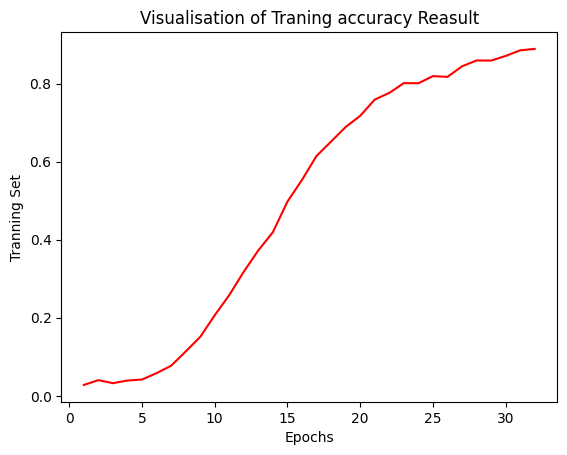

In [27]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,traning_history.history['accuracy'],color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Tranning Set')
plt.title('Visualisation of Traning accuracy Reasult')
plt.show()

##Validation Accruacy

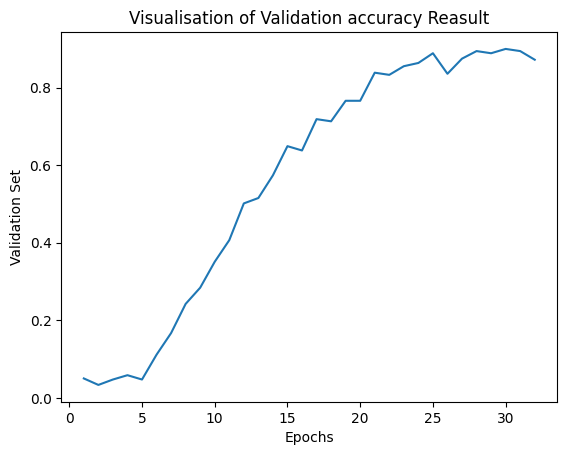

In [28]:
plt.plot(epochs,traning_history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Validation Set")
plt.title('Visualisation of Validation accuracy Reasult')
plt.show()

In [29]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     5,538,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,233,358 (65.74 MB)

 Trainable params: 5,744,452 (21.91 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,488,906 (43.83 MB)